In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from sklearn.metrics import classification_report

from keras.datasets import fashion_mnist

from keras.layers import Dense, Input, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten,InputLayer,SpatialDropout2D

from keras.models import Sequential, Model

from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import image 
import matplotlib.pyplot as plt
from google.colab import drive
import os


Mounted at /content/drive


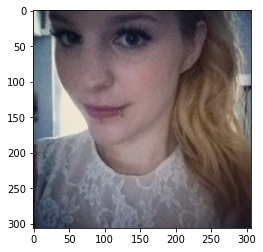

In [ ]:
drive.mount('/content/drive')
img = image.load_img("//content/drive/MyDrive/DATA/final_data/0_selfie_indoor/00a454da495e11e28a7322000a1fa414_6.jpg")
plt.imshow(img)

In [ ]:
import cv2
import glob

In [ ]:
x_pi=[]
files = glob.glob ('/content/drive/MyDrive/DATA/final_data/2_pose_indoor/*')
for myFile in files:
    image = cv2.imread (myFile)
    img=cv2.resize(image, (256,256))
    x_pi.append(img)

print('x_pi shape:', np.array(x_pi).shape)

x_pi shape: (500, 256, 256, 3)


In [ ]:
xtrain_pi=np.array(x_pi[:350])
xtest_pi=np.array(x_pi[350:])

In [ ]:
y_pi=[]

for i in range(501):
  y_pi.append(2)

ytrain_pi=np.array(y_pi[:350])
ytest_pi=np.array(y_pi[350:])



In [ ]:
print((xtrain_pi.shape),(xtest_pi.shape),(ytrain_pi.shape),(ytest_pi.shape))

(350, 256, 256, 3) (150, 256, 256, 3) (350,) (151,)


In [ ]:
x_po = []
files = glob.glob ("/content/drive/MyDrive/DATA/final_data/3_pose_outdoor/*")
for myFile in files:
    image = cv2.imread (myFile)
    img=cv2.resize(image, (256,256))
    x_po.append(img)

print('x_po shape:', np.array(x_po).shape)

x_po shape: (500, 256, 256, 3)


In [ ]:
xtrain_po=np.array(x_po[:350])
xtest_po=np.array(x_po[350:])

In [ ]:
y_po=[]

for i in range(501):
  y_po.append(3)

ytrain_po=np.array(y_po[:350])
ytest_po=np.array(y_po[350:])

In [ ]:
print((xtrain_po.shape),(xtest_po.shape),(ytrain_po.shape),(ytest_po.shape))

(350, 256, 256, 3) (150, 256, 256, 3) (350,) (151,)


In [ ]:
x_si = []
files = glob.glob ("/content/drive/MyDrive/DATA/final_data/0_selfie_indoor/*")
for myFile in files:
    image = cv2.imread (myFile)
    img==cv2.resize(image, (256,256))
    x_si.append(img)

print('x_si shape:', np.array(x_si).shape)

x_si shape: (500, 256, 256, 3)


In [ ]:
xtrain_si=np.array(x_si[:350])
xtest_si=np.array(x_si[350:])

In [ ]:
y_si=[]

for i in range(500):
  y_si.append(0)

ytrain_si=np.array(y_si[:350])
ytest_si=np.array(y_si[350:])

In [ ]:
print((xtrain_si.shape),(xtest_si.shape),(ytrain_si.shape),(ytest_si.shape))

(350, 256, 256, 3) (150, 256, 256, 3) (350,) (150,)


In [ ]:
# for i in range(10):
#   X_2[i] = cv2.resize(X_2[i], (306, 306))

# ex = cv2.resize(X_2[0], (306,306))

# ex.shape

# plt.imshow(X_2[0])

In [ ]:
x_so = []
files = glob.glob ("/content/drive/MyDrive/DATA/final_data/1_selfie_outdoor/*")
for myFile in files:
    image = cv2.imread (myFile)
    img=cv2.resize(image, (256,256))
    x_so.append(img)

print('x_so shape:', np.array(x_so).shape)

x_so shape: (500, 256, 256, 3)


In [ ]:
xtrain_so=np.array(x_so[:350])
xtest_so=np.array(x_so[350:])

In [ ]:
y_so=[]

for i in range(500):
  y_so.append(1)

ytrain_so=np.array(y_so[:350])
ytest_so=np.array(y_so[350:])

In [ ]:
print((xtrain_so.shape),(xtest_so.shape),(ytrain_so.shape),(ytest_so.shape))

(350, 256, 256, 3) (150, 256, 256, 3) (350,) (150,)


In [ ]:
x_wp = []
files = glob.glob ("/content/drive/MyDrive/DATA/final_data/4_without_human/*")
for myFile in files:
    image = cv2.imread (myFile)
    x_wp.append(img)

print('x_wp shape:', np.array(x_wp).shape)

x_wp shape: (500, 256, 256, 3)


In [ ]:
xtrain_wp=np.array(x_wp[:350])
xtest_wp=np.array(x_wp[350:])

In [ ]:
y_wp=[]

for i in range(500):
  y_wp.append(4)

ytrain_wp=np.array(y_wp[:350])
ytest_wp=np.array(y_wp[350:])

In [ ]:
print((xtrain_wp.shape),(xtest_wp.shape),(ytrain_wp.shape),(ytest_wp.shape))

(350, 256, 256, 3) (150, 256, 256, 3) (350,) (150,)


In [ ]:
ytrain_si=y_si[:350]
ytrain_so=y_so[:350]
ytrain_pi=y_pi[:350]
ytrain_po=y_po[:350]
ytrain_wp=y_wp[:350]

y_train=ytrain_si + ytrain_so + ytrain_pi + ytrain_po + ytrain_wp

print(len(y_train))

y_train=np.stack(y_train,axis=0)

y_train.shape

1750


(1750,)

In [ ]:
xtrain_si=x_si[:350]
xtrain_so=x_so[:350]
xtrain_pi=x_pi[:350]
xtrain_po=x_po[:350]
xtrain_wp=x_wp[:350]

X_train = xtrain_si + xtrain_so + xtrain_pi + xtrain_po + xtrain_wp

print(len(X_train))

X_train=np.stack(X_train,axis=0)

X_train.shape

1750


(1750, 256, 256, 3)

In [ ]:
from numpy import save 


In [ ]:
np.savez('final_train_dataset.npz', X=X_train, y=y_train)

In [ ]:
data = np.load('final_train_dataset.npz')

In [ ]:
data

In [ ]:
ytest_si=y_si[350:]
ytest_so=y_so[350:]
ytest_pi=y_pi[350:]
ytest_po=y_po[350:]
ytest_wp=y_wp[350:]

y_test=ytest_si + ytest_so + ytest_pi + ytest_po + ytest_wp

print(len(y_test))

y_test=np.stack(y_test,axis=0)

y_test.shape

752


(752,)

In [ ]:
xtest_si=x_si[350:]
xtest_so=x_so[350:]
xtest_pi=x_pi[350:]
xtest_po=x_po[350:]
xtest_wp=x_wp[350:]

X_test = xtest_si + xtest_so + xtest_pi + xtest_po + xtest_wp

print(len(X_test))

X_test=np.stack(X_test,axis=0)

X_test.shape

750


(750, 256, 256, 3)

In [ ]:
np.savez('final_test_dataset.npz', X=X_test, y=y_test)

data = np.load('final_test_dataset.npz')

data


** USING ONLY ONE CHANNEL DATA**

In [ ]:
X_train = np.mean(X_train,axis=3)
X_test = np.mean(X_test,axis=3)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train.shape

(1750, 256, 256)

In [ ]:
X_train_1D = X_train.reshape(X_train.shape[0], -1)
X_test_1D = X_test.reshape(X_test.shape[0], -1)

In [ ]:
X_train_1D.shape, X_test_1D.shape

((1750, 65536), (750, 65536))

In [ ]:
label_names=np.array(['selfie_indoor', 'selfie_outdoor', 'pose_indoor', 'pose_outdoor', 'without_human'])

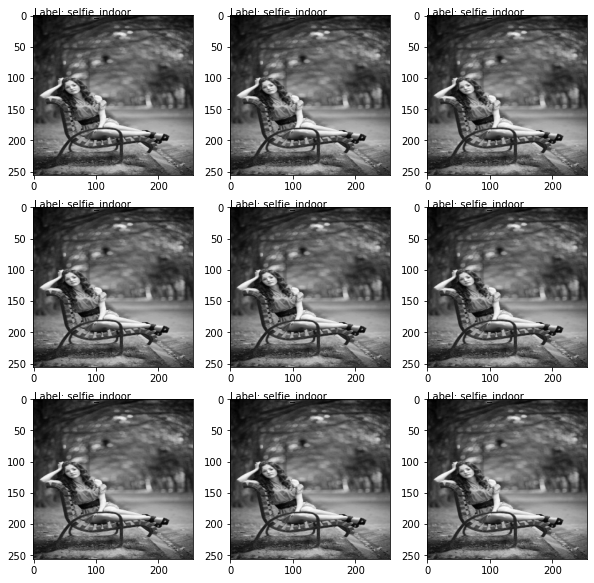

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

for i in range(3*3):
    ax1 = fig.add_subplot(3,3,i+1)
    ax1.imshow(X_train[i], cmap='gray')
    title = "Label: "+ label_names[y_train[i]]
    ax1.text(0, -1, title, size=10)

plt.show()

In [ ]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(256,256,1)))
model.add(Conv2D(32, kernel_size = (3, 3), strides=2, activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size = (3, 3), activation="relu"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

callback1 = ModelCheckpoint('modelcnn.pt', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
callaback2 = EarlyStopping(patience=5)
callback_list = [callback1, callaback2]

model.summary()


ValueError: ignored

In [ ]:
# cnn_train_history = model.fit(X_train,y_train, validation_data=(X_test,y_test), 
#                                  epochs=50, batch_size=50,
#                                  callbacks=callback_list)

In [ ]:
# cnn_pred = model.predict(x_test)

# cnn_pred=np.argmax(cnn_pred,axis=1)

# print(classification_report(y_test, cnn_pred,target_names = label_names))

In [ ]:
def CNN_model(input_shape, num_cells, output_shape):
   _input = Input(input_shape)
   layer = Conv2D(filters = 500, kernel_size = (9, 9), padding='same', activation='relu', strides=(1, 1))(_input)
   layer = Conv2D(350, (9, 9), activation='relu', padding='same')(layer)
   layer = MaxPooling2D(pool_size=(2, 2))(layer)
   layer = Dropout(0.25)(layer)
   layer = Flatten()(layer)
   layer =  Dense(1025, activation= 'relu')(layer)
   _output = Dense(output_shape, activation='softmax')(layer)

   my_model = Model(inputs=[_input], outputs=[_output])
   my_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
   return my_model


In [ ]:
callback1 = ModelCheckpoint('model1_cnn.pt', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
callaback2 = EarlyStopping(patience=5)
callback_list = [callback1, callaback2]

input_shape  = (256, 256, 1)
num_cells = 500
output_shape = len(np.unique(y_train))


cnn_model = CNN_model(input_shape,num_cells,output_shape)
cnn_model.summary()

ResourceExhaustedError: ignored

# **clustering**

In [ ]:
import pandas as pd

df = pd.DataFrame(X_train_1D)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,65496,65497,65498,65499,65500,65501,65502,65503,65504,65505,65506,65507,65508,65509,65510,65511,65512,65513,65514,65515,65516,65517,65518,65519,65520,65521,65522,65523,65524,65525,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,0.035294,0.040523,0.031373,0.032680,0.043137,0.050980,0.056209,0.048366,0.035294,0.035294,0.032680,0.026144,0.023529,0.019608,0.019608,0.036601,0.053595,0.064052,0.067974,0.058824,0.064052,0.060131,0.064052,0.077124,0.077124,0.083660,0.086275,0.090196,0.083660,0.075817,0.066667,0.056209,0.048366,0.048366,0.053595,0.049673,0.047059,0.035294,0.045752,0.043137,...,0.168627,0.166013,0.185621,0.207843,0.244444,0.295425,0.304575,0.326797,0.341176,0.347712,0.325490,0.279739,0.286275,0.283660,0.338562,0.305882,0.286275,0.279739,0.305882,0.333333,0.300654,0.233987,0.160784,0.151634,0.166013,0.115033,0.132026,0.186928,0.150327,0.128105,0.179085,0.186928,0.175163,0.171242,0.180392,0.175163,0.156863,0.133333,0.100654,0.105882
1,0.035294,0.040523,0.031373,0.032680,0.043137,0.050980,0.056209,0.048366,0.035294,0.035294,0.032680,0.026144,0.023529,0.019608,0.019608,0.036601,0.053595,0.064052,0.067974,0.058824,0.064052,0.060131,0.064052,0.077124,0.077124,0.083660,0.086275,0.090196,0.083660,0.075817,0.066667,0.056209,0.048366,0.048366,0.053595,0.049673,0.047059,0.035294,0.045752,0.043137,...,0.168627,0.166013,0.185621,0.207843,0.244444,0.295425,0.304575,0.326797,0.341176,0.347712,0.325490,0.279739,0.286275,0.283660,0.338562,0.305882,0.286275,0.279739,0.305882,0.333333,0.300654,0.233987,0.160784,0.151634,0.166013,0.115033,0.132026,0.186928,0.150327,0.128105,0.179085,0.186928,0.175163,0.171242,0.180392,0.175163,0.156863,0.133333,0.100654,0.105882
2,0.035294,0.040523,0.031373,0.032680,0.043137,0.050980,0.056209,0.048366,0.035294,0.035294,0.032680,0.026144,0.023529,0.019608,0.019608,0.036601,0.053595,0.064052,0.067974,0.058824,0.064052,0.060131,0.064052,0.077124,0.077124,0.083660,0.086275,0.090196,0.083660,0.075817,0.066667,0.056209,0.048366,0.048366,0.053595,0.049673,0.047059,0.035294,0.045752,0.043137,...,0.168627,0.166013,0.185621,0.207843,0.244444,0.295425,0.304575,0.326797,0.341176,0.347712,0.325490,0.279739,0.286275,0.283660,0.338562,0.305882,0.286275,0.279739,0.305882,0.333333,0.300654,0.233987,0.160784,0.151634,0.166013,0.115033,0.132026,0.186928,0.150327,0.128105,0.179085,0.186928,0.175163,0.171242,0.180392,0.175163,0.156863,0.133333,0.100654,0.105882
3,0.035294,0.040523,0.031373,0.032680,0.043137,0.050980,0.056209,0.048366,0.035294,0.035294,0.032680,0.026144,0.023529,0.019608,0.019608,0.036601,0.053595,0.064052,0.067974,0.058824,0.064052,0.060131,0.064052,0.077124,0.077124,0.083660,0.086275,0.090196,0.083660,0.075817,0.066667,0.056209,0.048366,0.048366,0.053595,0.049673,0.047059,0.035294,0.045752,0.043137,...,0.168627,0.166013,0.185621,0.207843,0.244444,0.295425,0.304575,0.326797,0.341176,0.347712,0.325490,0.279739,0.286275,0.283660,0.338562,0.305882,0.286275,0.279739,0.305882,0.333333,0.300654,0.233987,0.160784,0.151634,0.166013,0.115033,0.132026,0.186928,0.150327,0.128105,0.179085,0.186928,0.175163,0.171242,0.180392,0.175163,0.156863,0.133333,0.100654,0.105882
4,0.035294,0.040523,0.031373,0.032680,0.043137,0.050980,0.056209,0.048366,0.035294,0.035294,0.032680,0.026144,0.023529,0.019608,0.019608,0.036601,0.053595,0.064052,0.067974,0.058824,0.064052,0.060131,0.064052,0.077124,0.077124,0.083660,0.086275,0.090196,0.083660,0.075817,0.066667,0.056209,0.048366,0.048366,0.053595,0.049673,0.047059,0.035294,0.045752,0.043137,...,0.168627,0.166013,0.185621,0.207843,0.244444,0.295425,0.304575,0.326797,0.341176,0.347712,0.325490,0.279739,0.286275,0.283660,0.338562,0.305882,0.286275,0.279739,0.305882,0.333333,0.300654,0.233987,0.160784,0.151634,0.166013,0.115033,0.132026,0.186928,0.150327,0.128105,0.179085,0.186928,0.175163,0.171242,0.180392,0.175163,0.156863,0.133333,0.100654,0.105882
...,...,...,...

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_train_1D)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_.shape

(1750,)

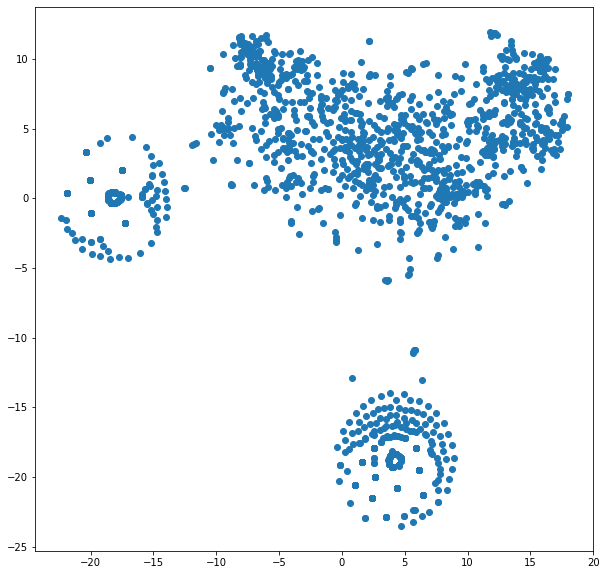

In [ ]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2).fit_transform(X_train_1D)
plt.figure(figsize=(10,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcd = []
sil_score = []
for k in range(3,7):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_1D)
  wcd.append(kmeans.inertia_) 
  sil_score.append(silhouette_score(X_train_1D, kmeans.labels_))

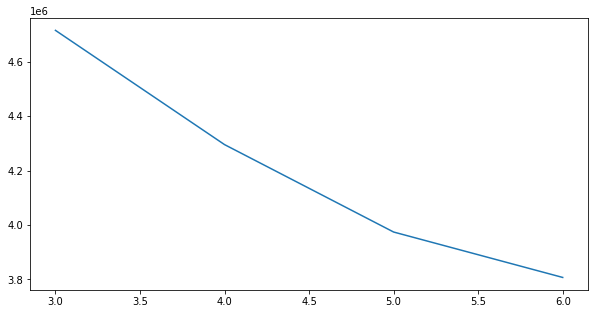

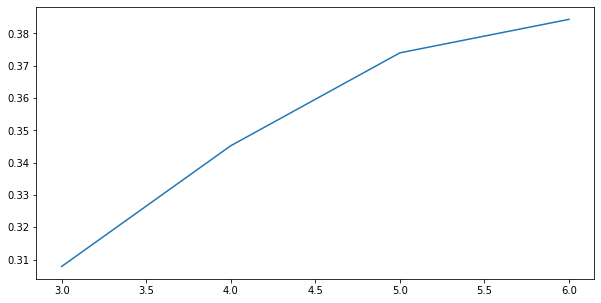

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(3,7), wcd)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(np.arange(3,7), sil_score)
plt.show()

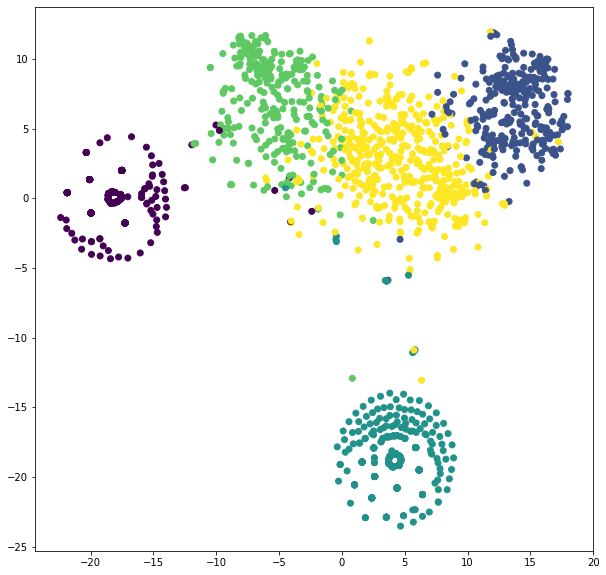

(array([0, 1, 2, 3, 4], dtype=int32), array([360, 291, 362, 283, 454]))


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train_1D)

plt.figure(figsize=(10,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.show()

print(np.unique(kmeans.labels_, return_counts=True))

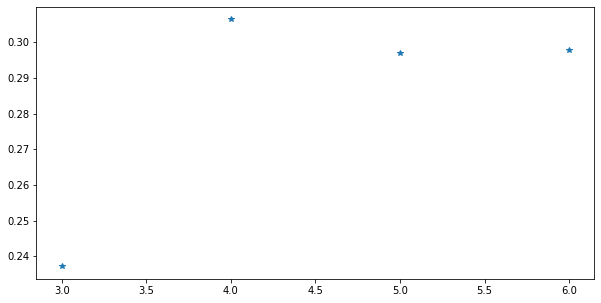

In [ ]:
from sklearn.cluster import AgglomerativeClustering

sil_score = []
for k in range(3,7):
  agg = AgglomerativeClustering(linkage="complete", n_clusters=k).fit(X_train_1D)
  sil_score.append(silhouette_score(X_train_1D, agg.labels_))

plt.figure(figsize=(10,5))
plt.plot(np.arange(3,7), sil_score, "*")
plt.show()

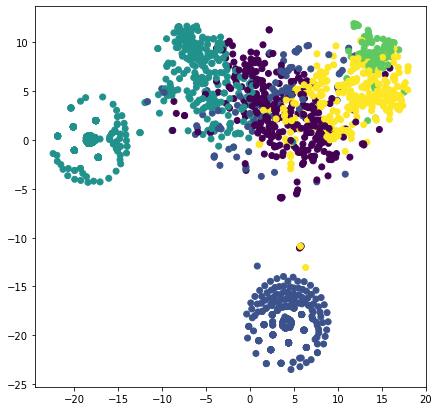

(array([0, 1, 2, 3, 4]), array([307, 444, 614,  93, 292]))
0.29684107690645256


In [ ]:
agg = AgglomerativeClustering(linkage="complete", n_clusters=5).fit(X_train_1D)

plt.figure(figsize=(7,7))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=agg.labels_)
plt.show()
print(np.unique(agg.labels_, return_counts=True))
print(silhouette_score(X_train_1D, agg.labels_))

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

def evaluate(model, parameter_grid, data):
    best_score=-1
    for param in parameter_grid:
        model.set_params(**param)
        model.fit(df)
        print(len(model.labels_))
        print(data.shape)
        print(set(model.labels_))
        print(len(np.unique(model.labels_)))
        if len(np.unique(model.labels_))>1: 
            current_score = silhouette_score(data, model.labels_) 
            print("Parameter : ", param, "Score :", current_score)
            if current_score>best_score: 
                best_score=current_score
                best_grid=param
                best_n_clusters = len(np.unique(model.labels_))
    print(best_grid)
    print(best_score)
    print(best_n_clusters)

model = DBSCAN()
parameters = {'eps' : np.arange(2.5,7.5,0.4), 
              'min_samples': [3,4,5,6,7,8,9]}
parameter_grid = ParameterGrid(parameters)

evaluate(model, parameter_grid, X_train_1D)

NameError: ignored

In [ ]:
dbs = DBSCAN(eps=7.2, min_samples=8).fit(X_train_1D)

plt.figure(figsize=(7,7))
plt.scatter(sample_tsne[:,0], sample_tsne[:,1], c=dbs.labels_)
plt.show()
print(np.unique(dbs.labels_, return_counts=True))
print(silhouette_score(sample1, dbs.labels_))

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
print("Adjusted Rand Score for Kmeans and Agglomerative Clustering:", adjusted_rand_score(agg.labels_, kmeans.labels_))
#print("Adjusted Rand Score for Kmeans and DBSCAN:", adjusted_rand_score(dbs.labels_, kmeans.labels_))
#print("Adjusted Rand Score for DBSCAN and Agglomerative Clustering:", adjusted_rand_score(agg.labels_, dbs.labels_))

Adjusted Rand Score for Kmeans and Agglomerative Clustering: 0.520302176968694


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
print("Adjusted Rand Score for Kmeans and True:", adjusted_rand_score(y_train, kmeans.labels_))
#print("Adjusted Rand Score for DBSCAN and True:", adjusted_rand_score(dbs.labels_, y_train))
print("Adjusted Rand Score for Agglomerative Clustering and True :", adjusted_rand_score(agg.labels_, y_train))

Adjusted Rand Score for Kmeans and True: 0.5044269005570445
Adjusted Rand Score for Agglomerative Clustering and True : 0.3493949072915529
